# **ST1/ST1G Assignment 9 (Capstone Programming Project)**

### This Project is based on E-commerce Price Prediction available from Kaggle repository (https://www.kaggle.com/datasets/bhuwanesh340/ecommerce-price-prediction/data ).


*   It contains the details of 2452 products.
*   Project task is to create a machine learning model which can predict the price of products based on its attributes.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.


### Step 1: Reading the data Reading the data with python

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
df=pd.read_csv('D:\PricePrediction\Train.csv', encoding='latin')
print('Shape before deleting duplicate values:', df.shape)

# Removing duplicate rows if any
df=df.drop_duplicates()
print('Shape After deleting duplicate values:', df.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
df.head(10)


Shape before deleting duplicate values: (2452, 8)
Shape After deleting duplicate values: (2452, 8)


,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0
5,P-5597,B-1487,home decor festive needs,table decor handicrafts,showpieces,5.0,9/4/2020,746.0
6,P-8398,B-3078,footwear,women s footwear,casual shoes,4.1,4/12/2017,1798.0
7,P-10744,B-2830,kitchen dining,cookware,pots pans,3.1,1/12/2013,955.0
8,P-4042,B-1045,home decor festive needs,wall decor clocks,paintings,2.4,18/3/2019,21770.0
9,P-360,B-88,automotive,accessories spare parts,car interior exterior,2.3,10/5/2018,199.0


## Key observations from Step 1 about Data Description


*   This file contains 2452 product details from dataset.
*   There are 8 attributes and they are outlined below.
*   Product - Unique ID for each product
*   Product_Brand
*   Item_Category
*   Subcategory_1
*   Subcategory_2
*   Item_Rating - customer ratings of products
*   Date - The date the item was sold
*   Selling_Price




# Step 2 : Problem Statement Definition
* Creating  a prediction model to wpredict the price of a product.
* Target Variable: SellingPrice
* Predictors/Features: Product/Product_Brand/Item_Category/Subcategory_1/Subcategory_2/Item_Rating/Date

## Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.
* Based on the problem statement to create a supervised ML Regression model, as the target variable is **Continuous**.


# Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed.

<Axes: >

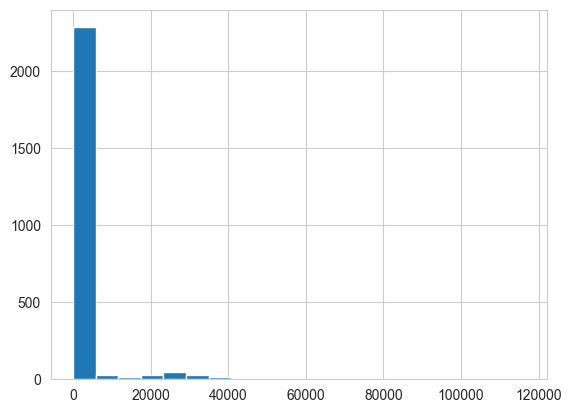

In [3]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous

df['Selling_Price'].hist(bins=20)


## Observations from Step 4
* The data distribution of the target variable is too skewed.
* After removing the data with large deviation there still have sufficient number of rows for each type of values to learn from.

## Step 5: Basic Exploratory Data Analysis


In [4]:
# Looking at sample rows in the data
df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [5]:
# Looking at sample rows in the data
df.tail()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
2447,P-8870,B-2292,clothing,kids clothing,girls wear,2.3,11/3/2017,741.0
2448,P-10672,B-3078,footwear,women s footwear,casual shoes,1.9,4/12/2016,1590.0
2449,P-2134,B-479,clothing,men s clothing,t shirts,1.9,19/4/2019,995.0
2450,P-724,B-133,automotive,accessories spare parts,car interior exterior,2.7,1/12/2014,1598.0
2451,P-1154,B-174,bags wallets belts,bags,pouches and potlis,4.1,3/3/2019,397.0


In [6]:
# Summarise information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2452 non-null   object 
 1   Product_Brand  2452 non-null   object 
 2   Item_Category  2452 non-null   object 
 3   Subcategory_1  2452 non-null   object 
 4   Subcategory_2  2452 non-null   object 
 5   Item_Rating    2452 non-null   float64
 6   Date           2452 non-null   object 
 7   Selling_Price  2452 non-null   float64
dtypes: float64(2), object(6)
memory usage: 153.4+ KB


In [7]:
# Looking at the descriptive statistics of the data
df.describe(include='all')

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
count,2452,2452,2452,2452,2452,2452.000000,2452,2452.000000
unique,2452,1010,75,130,336,NaN,483,NaN
top,P-1154,B-3078,clothing,women s clothing,western wear,NaN,1/12/2013,NaN
freq,1,688,717,476,267,NaN,86,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.078467,NaN,2494.375612
std,NaN,NaN,NaN,NaN,NaN,1.187137,NaN,7115.256516
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,33.000000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,371.000000
50%,NaN,NaN,NaN,NaN,NaN,3.100000,NaN,596.000000
75%,NaN,NaN,NaN,NaN,NaN,4.100000,NaN,1195.250000


In [8]:
#Convert Date into categorical variable
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

# import the holidays list
import holidays

df['Date'] = pd.to_datetime(df['Date'])

# Create a holidays object for Australia
aus_holidays = holidays.Australia(years=[df['Date'].dt.year.min(), df['Date'].dt.year.max()])

# Check each date in the Date column to see if it is a holiday
df['Is_Holiday'] = df['Date'].apply(lambda x: 1 if x in aus_holidays else 0)
print(df.head())


  Product Product_Brand             Item_Category     Subcategory_1  \
0  P-2610         B-659        bags wallets belts              bags   
1  P-2453        B-3078                  clothing  women s clothing   
2  P-6802        B-1810  home decor festive needs        showpieces   
3  P-4452        B-3078  beauty and personal care          eye care   
4  P-8454        B-3078                  clothing    men s clothing   

       Subcategory_2  Item_Rating       Date  Selling_Price  Is_Holiday  
0          hand bags          4.3 2017-03-02          291.0           0  
1       western wear          3.1 2015-01-07          897.0           0  
2             ethnic          3.5 2019-12-01          792.0           0  
3  h2o plus eye care          4.0 2014-12-12          837.0           0  
4           t shirts          4.3 2013-12-12          470.0           0  


In [9]:
# Finding unique values for each column
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

Product          2452
Product_Brand    1010
Item_Category      75
Subcategory_1     130
Subcategory_2     336
Item_Rating        41
Date              483
Selling_Price    1095
Is_Holiday          2
dtype: int64

## Observations from Step 5 - Basic Exploratory Data Analysis
* Product          - Just products' unique ID, waiting for delete.
* Product_Brand    - Categorical. Selected.
* Item_Category    - Categorical. Selected.
* Subcategory_1    - Categorical. Selected.
* Subcategory_2    - Categorical. Selected.
* Item_Rating      - Continuous. Selected.
* Date             - Transfer to Is_Holiday
* Selling_Price    - Continuous. Selected. This is the Target variable.
* Is_Holiday       - Categorial. Selected.

## Step 7: Removing Unwanted columns
* If each product has a unique identifier, this column will not provide any generalizable insight into the selling price across different products, as it does not encode any repeatable pattern that can be learned by the model.
* Remove the Product column as it is likely to lead to overfitting, where the model learns noise specific to individual data points rather than general trends.
* Converting dates to categorical variables for research and machine learning. Considering that sales discounts are offered on holidays, there is an impact on the sales price.
* Replace Date column with Is_Holidays.

In [10]:
#Convert Date into categorical variable
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

# import the holidays list
import holidays

df['Date'] = pd.to_datetime(df['Date'])

# Create a holidays object for Australia
aus_holidays = holidays.Australia(years=[df['Date'].dt.year.min(), df['Date'].dt.year.max()])

# Check each date in the Date column to see if it is a holiday
df['Is_Holiday'] = df['Date'].apply(lambda x: 1 if x in aus_holidays else 0)
print(df.head())

# Remove 'Product' and 'Date'.
df = df.drop('Product', axis=1)
df = df.drop('Date', axis=1)


  Product Product_Brand             Item_Category     Subcategory_1  \
0  P-2610         B-659        bags wallets belts              bags   
1  P-2453        B-3078                  clothing  women s clothing   
2  P-6802        B-1810  home decor festive needs        showpieces   
3  P-4452        B-3078  beauty and personal care          eye care   
4  P-8454        B-3078                  clothing    men s clothing   

       Subcategory_2  Item_Rating       Date  Selling_Price  Is_Holiday  
0          hand bags          4.3 2017-03-02          291.0           0  
1       western wear          3.1 2015-01-07          897.0           0  
2             ethnic          3.5 2019-12-01          792.0           0  
3  h2o plus eye care          4.0 2014-12-12          837.0           0  
4           t shirts          4.3 2013-12-12          470.0           0  


## Step 8: Visual Exploratory Data Analysis
* Based on the Basic Exploration Data Analysis in the previous step,  we could spotted two categorical predictors in the data
* Categorical Predictors:

* Product_Brand
* Item_Category
* Subcategory_1
* Subcategory_2
* Is_Holiday  

* Use bar charts to see how the data is distributed for these categorical columns.


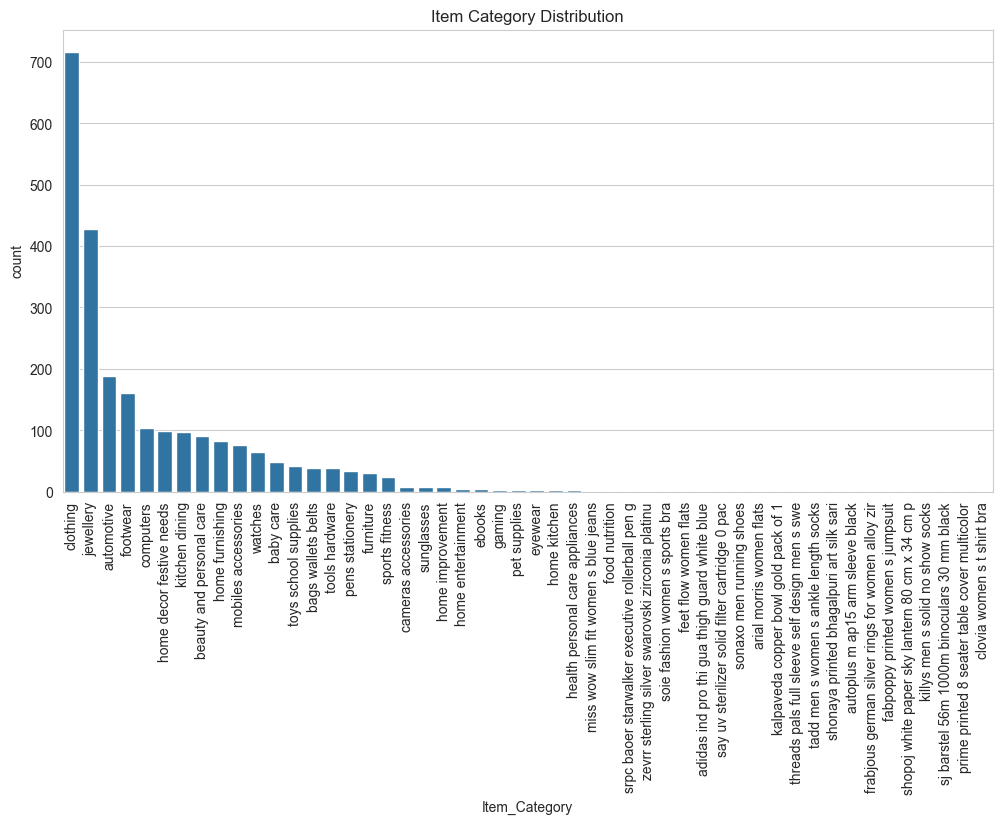

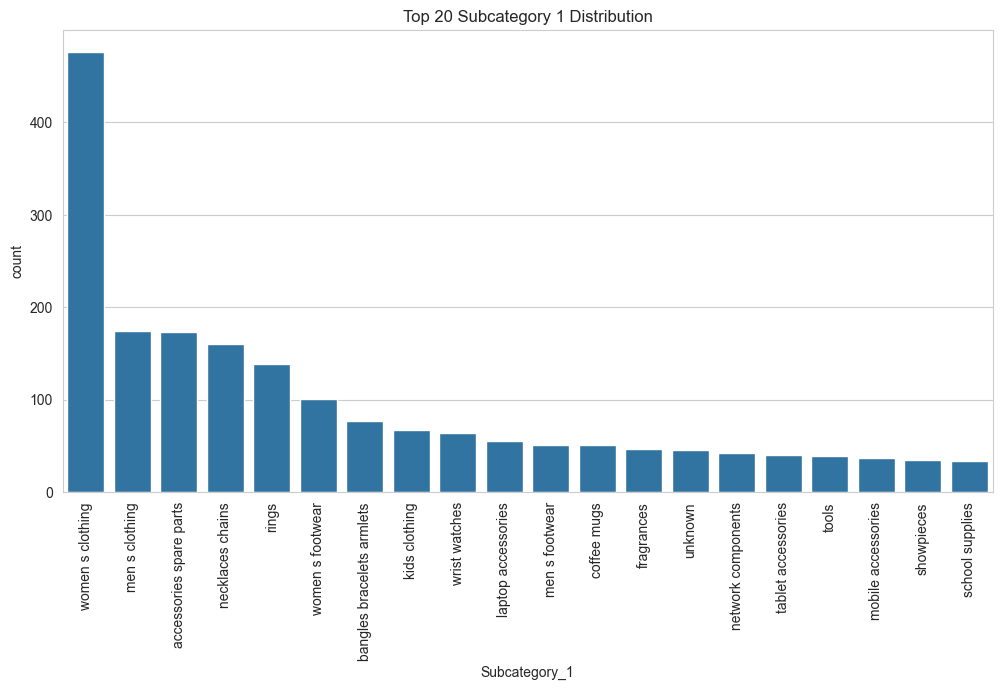

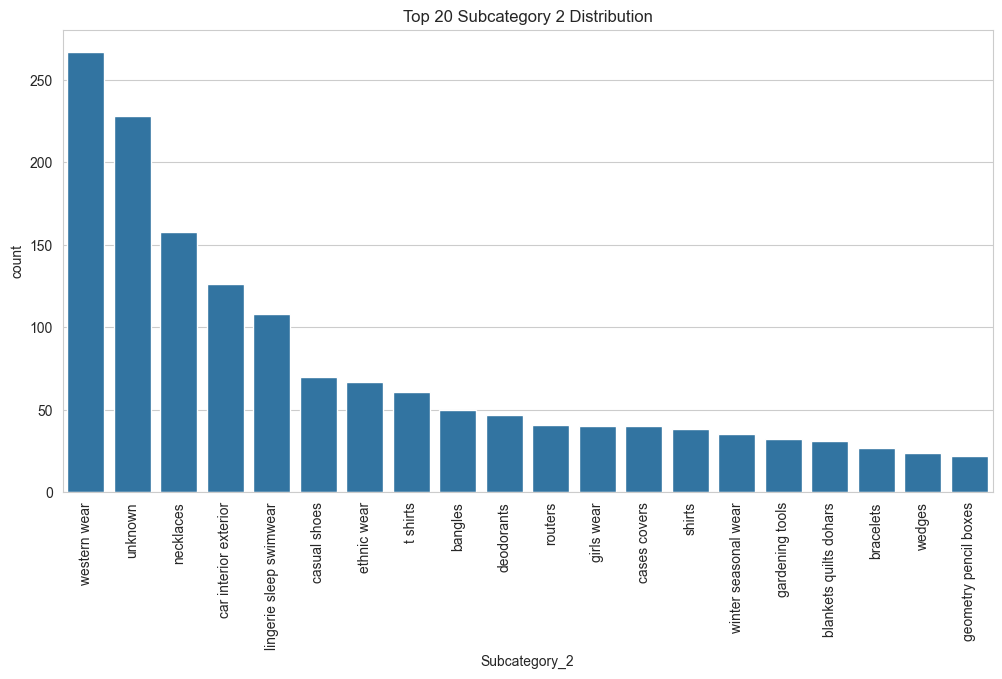

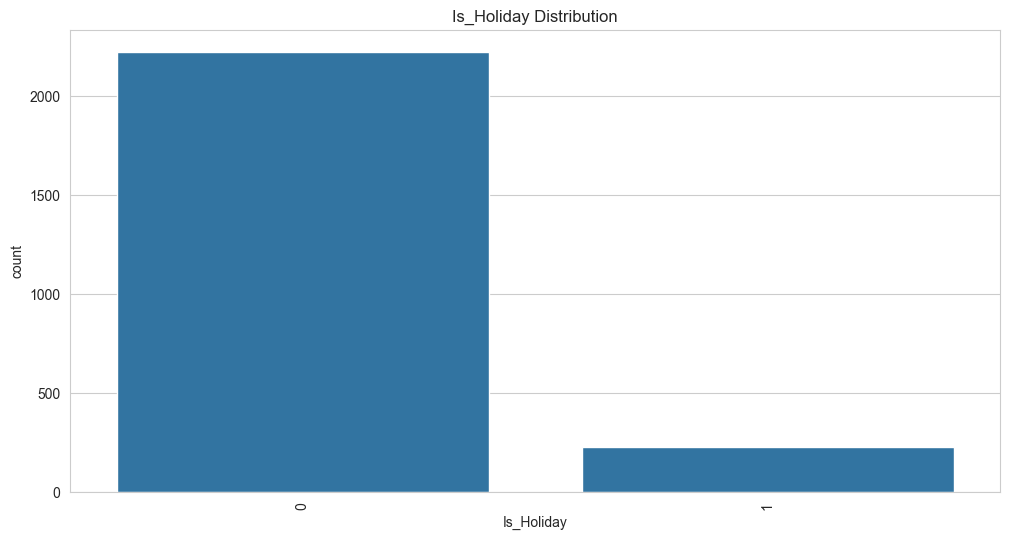

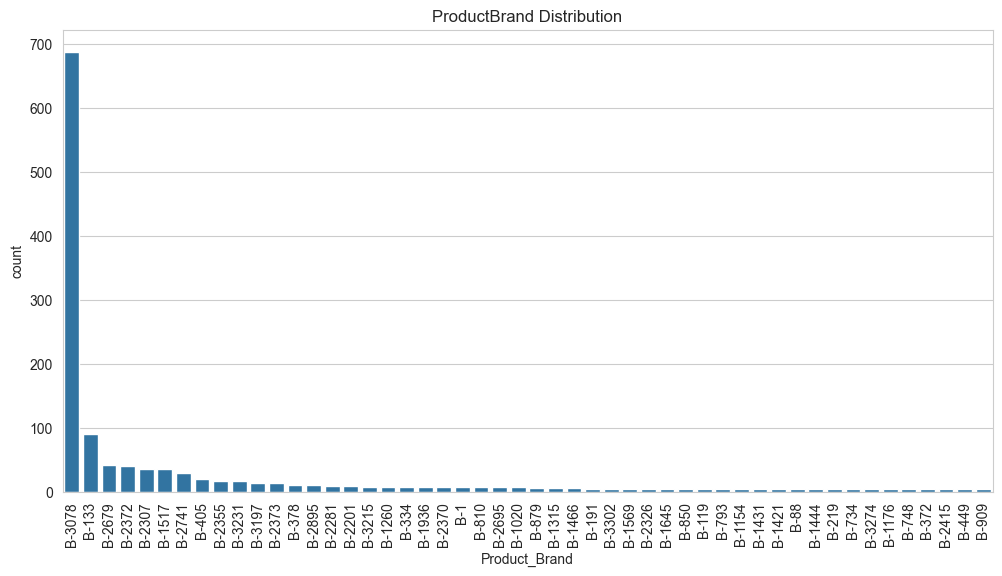

In [11]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

import matplotlib.pyplot as plt
import seaborn as sns

#  Item_Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Item_Category', order=df['Item_Category'].value_counts().index[:50])
plt.xticks(rotation=90)
plt.title('Item Category Distribution')
plt.show()

# Subcategory_1
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Subcategory_1', order=df['Subcategory_1'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.title('Top 20 Subcategory 1 Distribution')
plt.show()

# Subcategory_2
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Subcategory_2', order=df['Subcategory_2'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.title('Top 20 Subcategory 2 Distribution')
plt.show()

#Is_Holiday
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Is_Holiday', order=df['Is_Holiday'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.title('Is_Holiday Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_Brand', order=df['Product_Brand'].value_counts().index[:50])
plt.xticks(rotation=90)
plt.title('ProductBrand Distribution')
plt.show()

## Observations from Step 8 - Visual Exploratory Data Analysis
* Although the distribution of Product_Brand and Item_Category bars charts is skewed, but they were retained given the need for the predictive model to include a variety of different categories of goods.

* Selected Categorical Variables (**Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Is_Holiday**): Both the categorical variables are selected for further analysis.

## Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms
* Based on the Basic Exploratory Data Analysis, there are 1 continuous predictor variables 'Item_Rating'.

array([[<Axes: title={'center': 'Item_Rating'}>,
        <Axes: title={'center': 'Selling_Price'}>]], dtype=object)

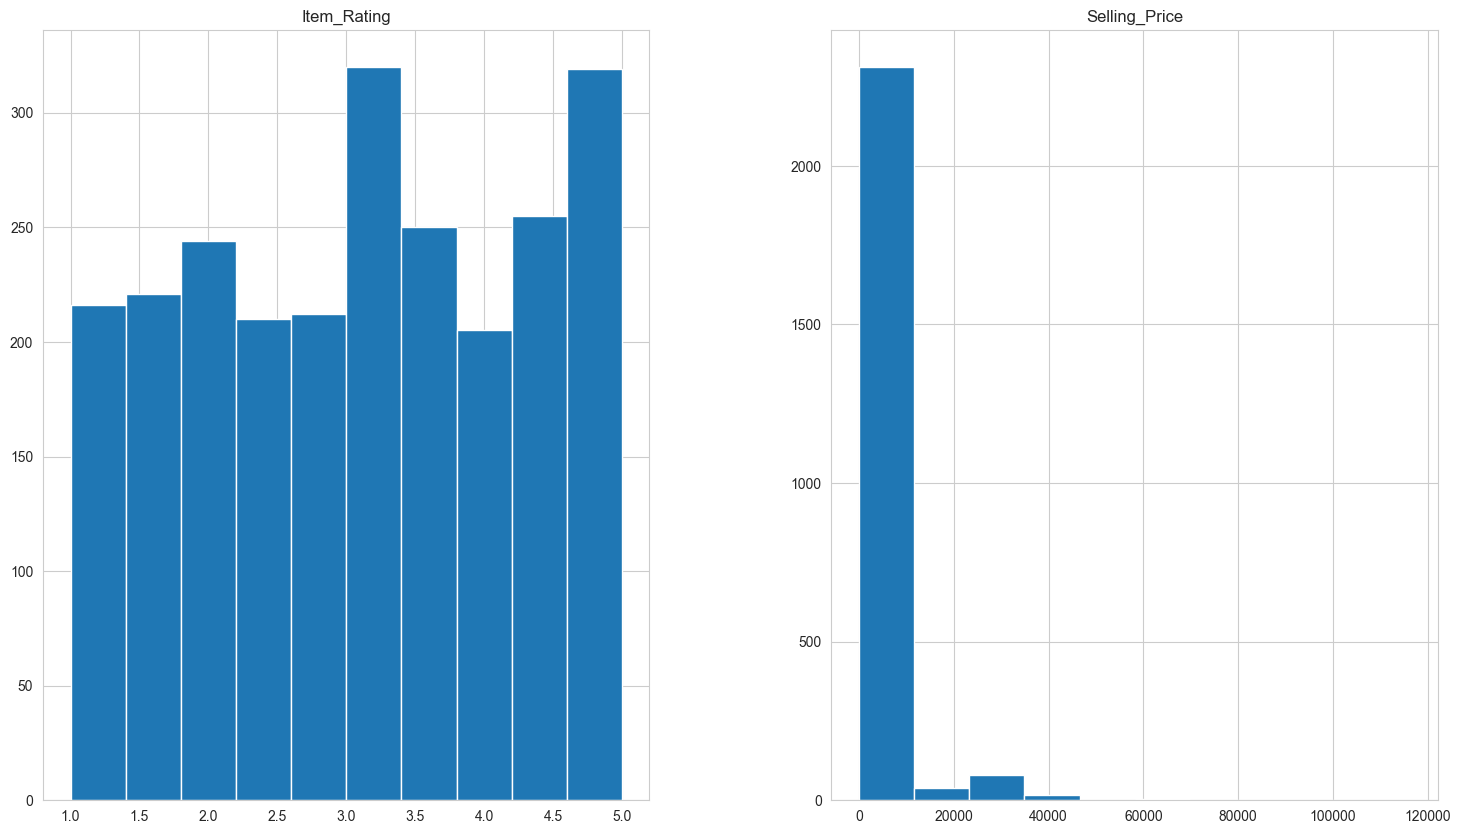

In [12]:
# Plotting histograms of multiple columns together
df.hist(['Item_Rating', 'Selling_Price'], figsize=(18,10))

## Observations from Step 9
* The distribution of Selling_Price is too skewed, with one piece of data dominating and under 6000 needing to be dealt with.

* Selected Continuous Variables:

* Selling_Price : Selected. Outliers seen beyond 6000, need to treat them.
* Item_Rating : Selected. The distribution is good.

## Step 10: Outlier Analysis
* Data with too high a selling price but very low frequency can make the model very inaccurate, so these outliers are removed


In [13]:
#Removing outliers for 'Selling_Price'

df = df[df['Selling_Price'] <= 6000]


Observation: Above result hence, deleting any value above 6000 with it.

## Step 11:Visualising Data Distribution after outlier removal


array([[<Axes: title={'center': 'Selling_Price'}>]], dtype=object)

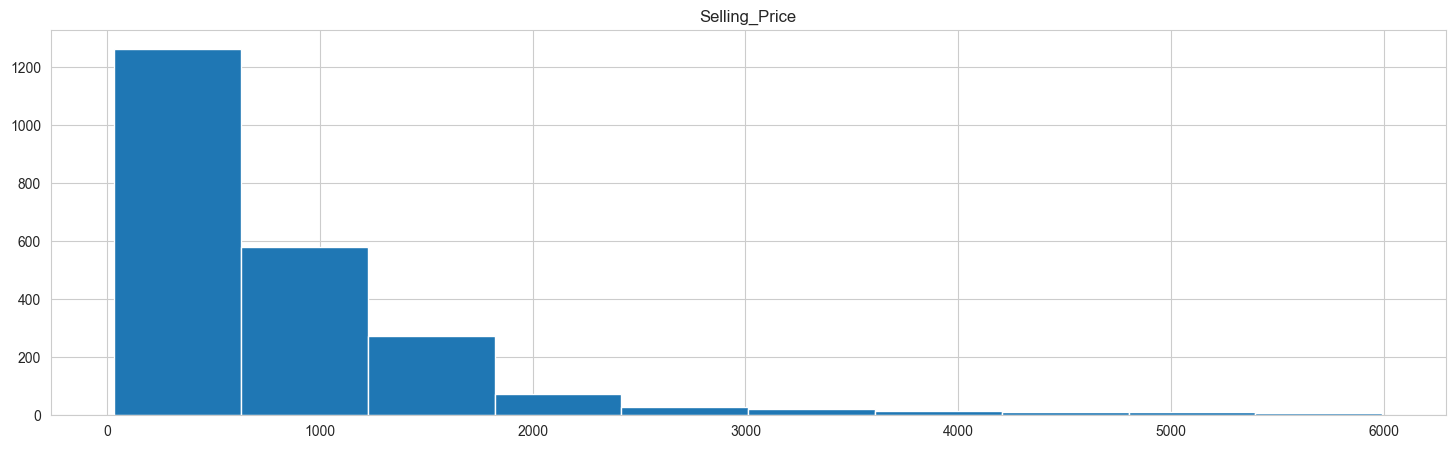

In [14]:
df.hist(['Selling_Price'], figsize=(18,5))

## Observation from Step 11
* The distribution has improved after the outlier treatment.
* There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

## Step 12: Missing Values Analysis

In [15]:
# Finding how many missing values are there for each column
df.isnull().sum()

Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Selling_Price    0
Is_Holiday       0
dtype: int64

##Observations from Step 12: Missing Value Analysis
* No missing values in this data!
* So no removal of any data samples(rows) is needed.


## Step 13: Feature Selection (Attribute Selection)

* **For this dataset, the Target variable is Continuous, hence following two scenarios will need attention**

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor


## Relationship exploration: Continuous Vs Continuous -- Scatter Charts
* Using scatter plot and measure the strength of relation using a metric called pearson's correlation value.

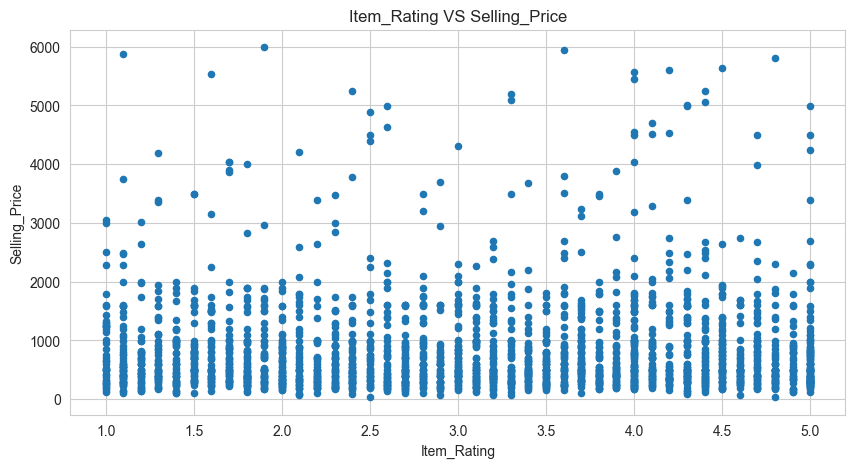

In [16]:
ContinuousCols=['Item_Rating']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='Selling_Price', figsize=(10,5), title=predictor+" VS "+ 'Selling_Price')

## Scatter charts interpretation
* **No Trend**: I cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence that predictor/feature may not be the best one for ML model building.

* I'll confirm this by looking at the correlation value in the next step.

## Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [17]:
# Calculating correlation matrix
ContinuousCols=['Selling_Price', 'Item_Rating']

# Creating the correlation matrix
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,Selling_Price,Item_Rating
Selling_Price,1.000000,0.012497
Item_Rating,0.012497,1.000000


In [18]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Selling_Price'][abs(CorrelationData['Selling_Price']) > 0.5 ]

Selling_Price    1.0
Name: Selling_Price, dtype: float64

## Observations from Step 14
* From the results we can see that there is no correlation between Item_Rating and the target variable. No Continuous columns selected.

# Step 15:  Relationship exploration: Categorical Vs Continuous -- Box Plots
* Measure the strength of relation using Anova test.

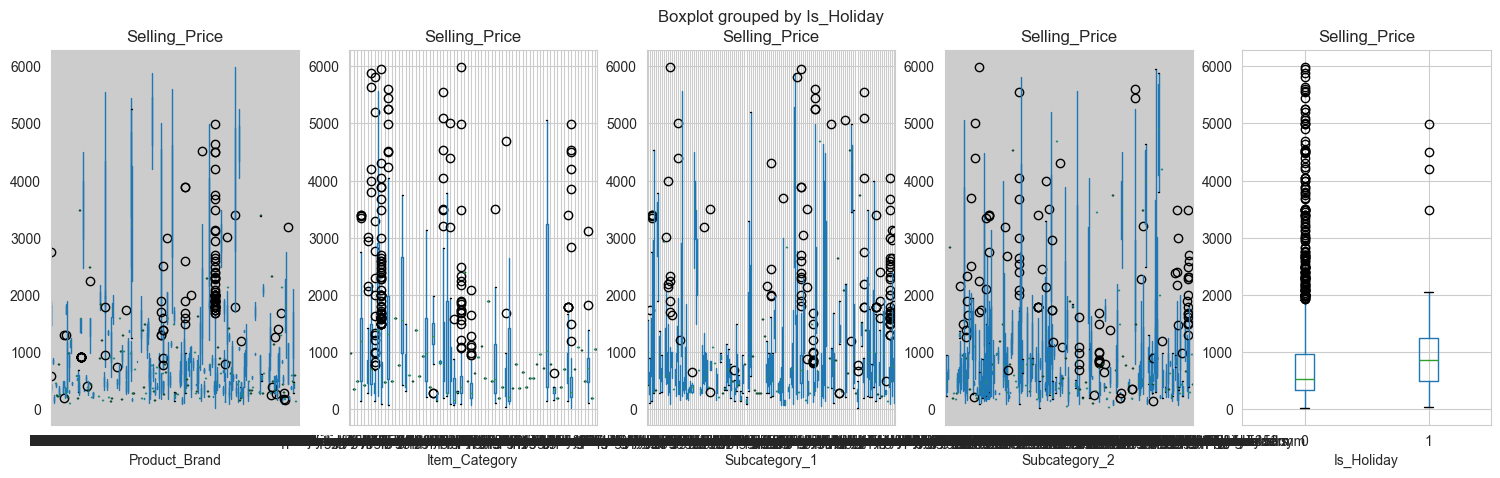

In [19]:
# Box plots for continuous Target Variable "Selling_Price" and Categorical predictors
CategoricalColsList=['Product_Brand','Item_Category', 'Subcategory_1', 'Subcategory_2', 'Is_Holiday']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df.boxplot(column='Selling_Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

##Observations from Step 15: Box-Plots interpretation
* The distribution is different for each category(the boxes are not in same line). It hints that these variables might be correlated with Selling_Price.

* For this data, all the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

## Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [20]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [21]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Product_Brand','Subcategory_1', 'Subcategory_2', 'Item_Category','Is_Holiday']
FunctionAnova(inpData=df,
              TargetVariable='Selling_Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Product_Brand is correlated with Selling_Price | P-Value: 2.1425355260682204e-88
Subcategory_1 is correlated with Selling_Price | P-Value: 2.4681250421581074e-129
Subcategory_2 is correlated with Selling_Price | P-Value: 2.5209381950497817e-168
Item_Category is correlated with Selling_Price | P-Value: 3.111751584879265e-40
Is_Holiday is correlated with Selling_Price | P-Value: 0.045754738240876405


['Product_Brand',
 'Subcategory_1',
 'Subcategory_2',
 'Item_Category',
 'Is_Holiday']

##Observations from Step 16
* Final selected Categorical columns:

'Product_Brand','Subcategory_1', 'Subcategory_2', 'Item_Category','Is_Holiday'


## Selecting final Predictors/Features for building Machine Learning/AI model.
* Select the final features/predictors/columns for machine learning model building as:
* **'Product_Brand','Subcategory_1', 'Subcategory_2', 'Item_Category','Is_Holiday**


In [22]:
SelectedColumns=['Product_Brand','Subcategory_1', 'Subcategory_2', 'Item_Category','Is_Holiday']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()


,Product_Brand,Subcategory_1,Subcategory_2,Item_Category,Is_Holiday
0,B-659,bags,hand bags,bags wallets belts,0
1,B-3078,women s clothing,western wear,clothing,0
2,B-1810,showpieces,ethnic,home decor festive needs,0
3,B-3078,eye care,h2o plus eye care,beauty and personal care,0
4,B-3078,men s clothing,t shirts,clothing,0


In [23]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Step 17: Data Pre-processing for Machine Learning Model Building or Model Development
Considering the large number of categorical variables in the predicted values, it is necessary to encode the data using one-hot coding for easy use in machine learning.


## Converting the nominal variable to numeric using get_dummies()

In [24]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Selling_Price']=df['Selling_Price']

# Printing sample rows
DataForML_Numeric.head()

,Is_Holiday,Product_Brand_B-1,Product_Brand_B-1000,Product_Brand_B-1004,Product_Brand_B-1008,Product_Brand_B-1009,Product_Brand_B-101,Product_Brand_B-1016,Product_Brand_B-1017,Product_Brand_B-1018,...,Item_Category_tools hardware,Item_Category_toys school supplies,Item_Category_ufo full sleeve solid girl s jacket,Item_Category_v g professional hd 37 hair dryer red,Item_Category_vishudh printed women s anarkali kurta,Item_Category_vishudh printed women s straight kurta,Item_Category_watches,Item_Category_yo baby girl s trousers,Item_Category_zevrr sterling silver swarovski zirconia platinu,Selling_Price
0,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,291.0
1,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,897.0
2,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,792.0
3,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,837.0
4,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,470.0


## Step 18: Machine Learning Model Development:

In [25]:
# Printing all the column names for reference
DataForML_Numeric.columns

Index(['Is_Holiday', 'Product_Brand_B-1', 'Product_Brand_B-1000',
       'Product_Brand_B-1004', 'Product_Brand_B-1008', 'Product_Brand_B-1009',
       'Product_Brand_B-101', 'Product_Brand_B-1016', 'Product_Brand_B-1017',
       'Product_Brand_B-1018',
       ...
       'Item_Category_tools hardware', 'Item_Category_toys school supplies',
       'Item_Category_ufo full sleeve solid girl s jacket',
       'Item_Category_v g professional hd 37 hair dryer red',
       'Item_Category_vishudh printed women s anarkali kurta',
       'Item_Category_vishudh printed women s straight kurta',
       'Item_Category_watches', 'Item_Category_yo baby girl s trousers',
       'Item_Category_zevrr sterling silver swarovski zirconia platinu',
       'Selling_Price'],
      dtype='object', length=1490)

In [26]:
#Separate Target Variable and Predictor Variables
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

TargetVariable = 'Selling_Price'
Predictors = [column for column in DataForML_Numeric.columns if column != TargetVariable]


# Extraction of features and target variables
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training(70%) and testing set(30%).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


## Step 19: Standardization/Normalization of data
* I'm using KNN, so this step is necessary.

In [27]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Using MinMAx normalization is better
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 1489)
(1600,)
(687, 1489)
(687,)


## Step 20: Multiple Linear Regression Algorithm For ML/AI model building

# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.22044128174276512

##### Model Validation and Accuracy Calculations ##########
   Is_Holiday  Product_Brand_B-1  Product_Brand_B-1000  Product_Brand_B-1004  \
0         0.0                0.0                   0.0                   0.0   
1         0.0                0.0                   0.0                   0.0   
2         0.0                0.0                   0.0                   0.0   
3         0.0                0.0                   0.0                   0.0   
4         0.0                0.0                   0.0                   0.0   

   Product_Brand_B-1008  Product_Brand_B-1009  Product_Brand_B-101  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  0.0   
4                

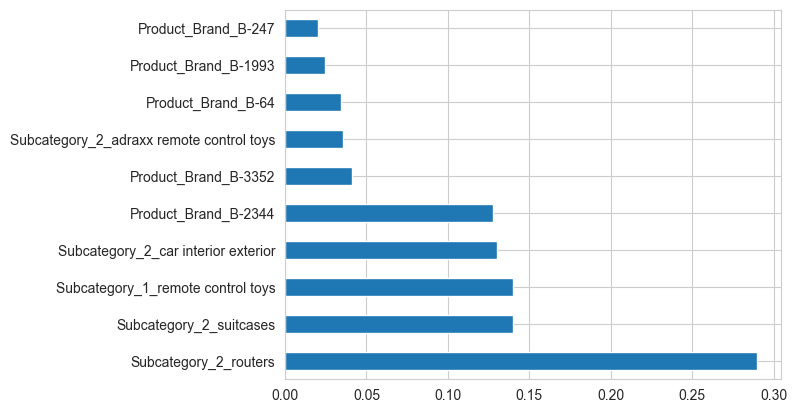

In [29]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Selling_Price']-TestingDataResults['PredictedSelling_Price']))/TestingDataResults['Selling_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting/Visualising the Decision Tree

In [32]:

# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

InvalidParameterError: The 'class_names' parameter of export_graphviz must be an array-like, an instance of 'bool' or an instance of 'numpy.bool' or None. Got 'Selling_Price' instead.

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.22364098361788198

##### Model Validation and Accuracy Calculations ##########
   Is_Holiday  Product_Brand_B-1  Product_Brand_B-1000  Product_Brand_B-1004  \
0         0.0                0.0                   0.0                   0.0   
1         0.0                0.0                   0.0                   0.0   
2         0.0                0.0                   0.0                   0.0   
3         0.0                0.0                   0.0                   0.0   
4         0.0                0.0                   0.0                   0.0   

   Product_Brand_B-1008  Product_Brand_B-1009  Product_Brand_B-101  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  0.0   

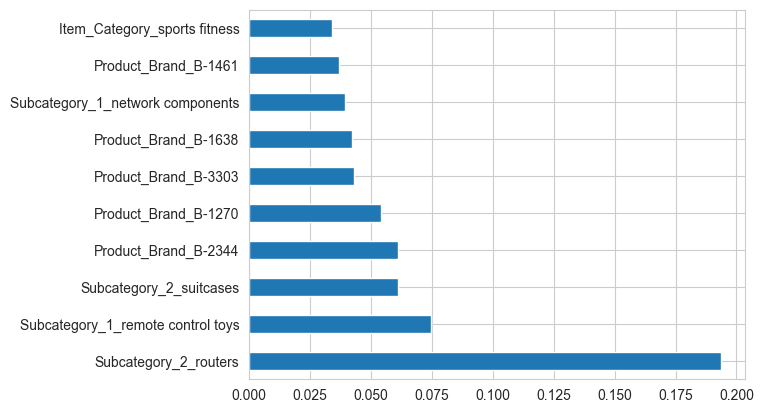

In [31]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Selling_Price']-TestingDataResults['PredictedSelling_Price']))/TestingDataResults['Selling_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


## Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(learning_rate=0.04, n_estimators=100)
R2 Value: 0.014918961782524387

##### Model Validation and Accuracy Calculations ##########
   Is_Holiday  Product_Brand_B-1  Product_Brand_B-1000  Product_Brand_B-1004  \
0         0.0                0.0                   0.0                   0.0   
1         0.0                0.0                   0.0                   0.0   
2         0.0                0.0                   0.0                   0.0   
3         0.0                0.0                   0.0                   0.0   
4         0.0                0.0                   0.0                   0.0   

   Product_Brand_B-1008  Product_Brand_B-1009  Product_Brand_B-101  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  0.0   
4                   0

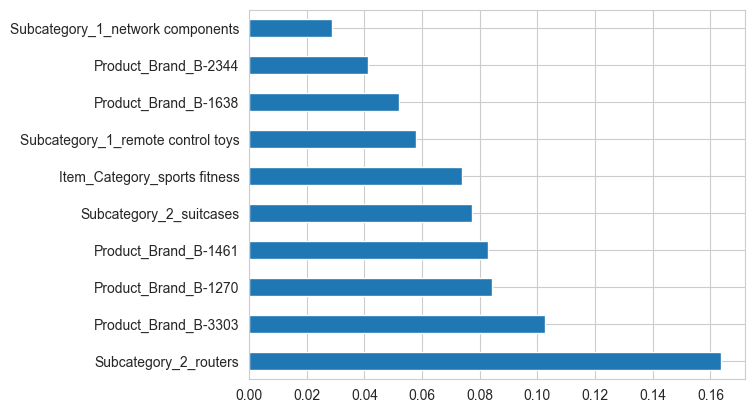

In [34]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100 ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Selling_Price']-TestingDataResults['PredictedSelling_Price']))/TestingDataResults['Selling_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.7631540244495216

##### Model Validation and Accuracy Calculations ##########
   Is_Holiday  Product_Brand_B-1  Product_Brand_B-1000  Product_Brand_B-1004  \
0         0.0                0.0                   0.0                   0.0  

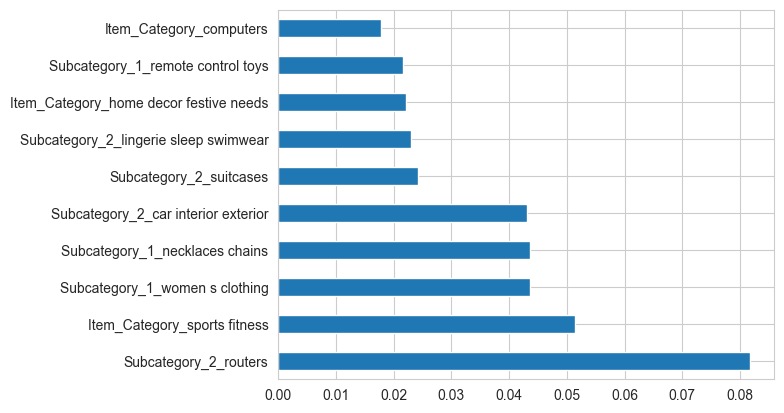

In [35]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Selling_Price']-TestingDataResults['PredictedSelling_Price']))/TestingDataResults['Selling_Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

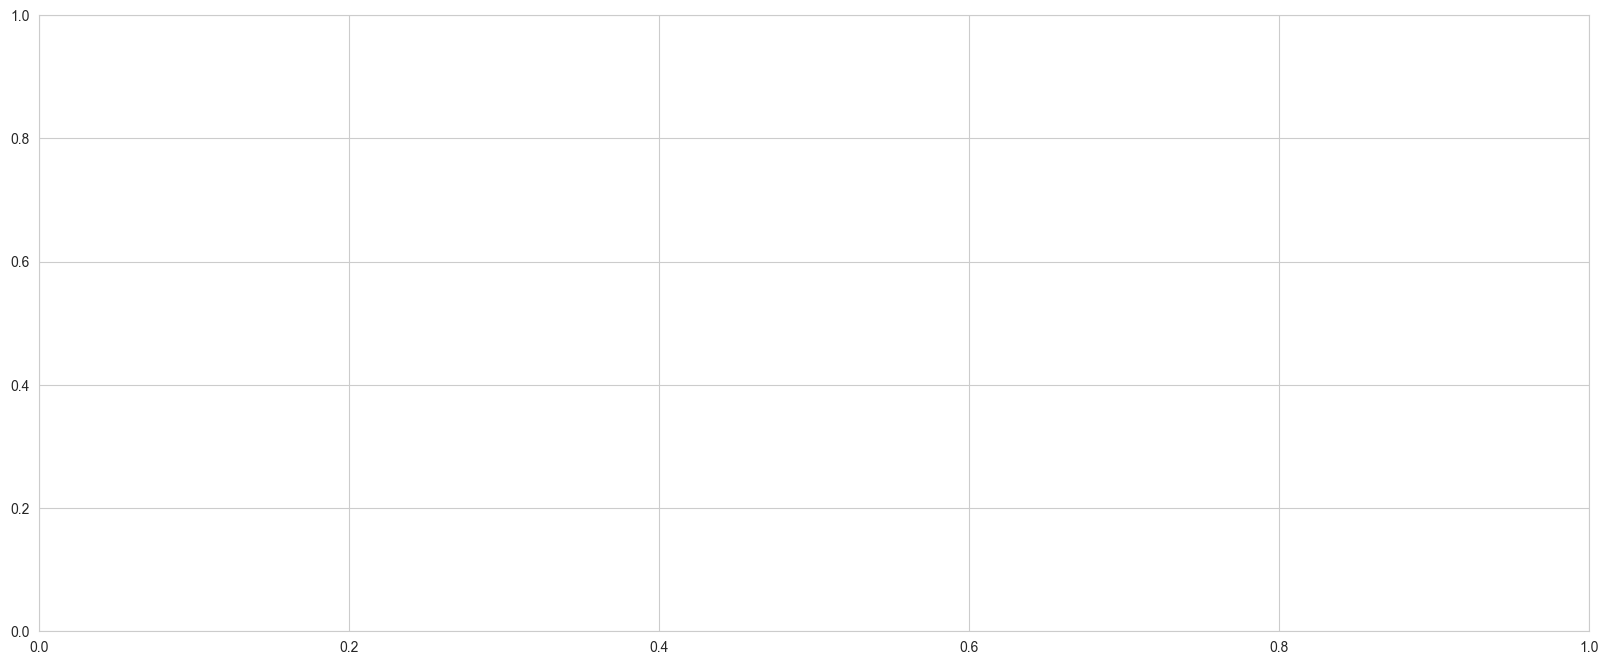

In [36]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# K-Nearest Neighbor(KNN)

In [37]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Selling_Price']-TestingDataResults['PredictedSelling_Price']))/TestingDataResults['Selling_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.5301742671767542

##### Model Validation and Accuracy Calculations ##########
   Is_Holiday  Product_Brand_B-1  Product_Brand_B-1000  Product_Brand_B-1004  \
0         0.0                0.0                   0.0                   0.0   
1         0.0                0.0                   0.0                   0.0   
2         0.0                0.0                   0.0                   0.0   
3         0.0                0.0                   0.0                   0.0   
4         0.0                0.0                   0.0                   0.0   

   Product_Brand_B-1008  Product_Brand_B-1009  Product_Brand_B-101  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  0.0   
4                   0.0                   0.

# Step 21: Model Deployment
* I am choosing XGboost as the final model it has the highest accuracy(35.78).

* For this dataset, the most important predictor variables are 'Product_Brand','Subcategory_1', 'Subcategory_2', 'Item_Category'. 

In [38]:
# Separate Target Variable and Predictor Variables
TargetVariable='Selling_Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=[column for column in DataForML_Numeric.columns if column != TargetVariable]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(2287, 1489)
(2287,)


# Cross validating the final model accuracy with less predictors

In [39]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [38.80307131 36.12950473 33.88790632 37.35519206 41.4410724  33.48880886
 32.97159135 25.29110276 32.45981776 44.50233774]

Final Average Accuracy of the model: 35.63


# Step 22: Retraining the final model using 100% data

In [40]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# Step 23: Save the model as a serialized file which can be stored anywhere

In [41]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: D:\PricePrediction


# Step 24: Create a python function

In [42]:
from re import IGNORECASE

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=[column for column in DataForML_Numeric.columns if column != TargetVariable]

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Step 25: Calling the function for some new data

In [43]:
# Load the test dataframe to test the function
test_data = pd.read_csv('D:\PricePrediction\Test.csv')
NewSampleData=pd.DataFrame(data=test_data,columns=['Product_Brand','Item_Category','Subcategory_1','Subcategory_2'])
print(NewSampleData)
# Passing the loaded DataFrame
FunctionPredictResult(InputData=NewSampleData)


     Product_Brand   Item_Category              Subcategory_1  \
0           B-2984       computers         network components   
1           B-1732       jewellery  bangles bracelets armlets   
2           B-3078        clothing           women s clothing   
3           B-1421       jewellery           necklaces chains   
4           B-3078        clothing           women s clothing   
...            ...             ...                        ...   
1046        B-2543  sports fitness          outdoor adventure   
1047        B-3197       jewellery           necklaces chains   
1048         B-133      automotive    accessories spare parts   
1049         B-358  kitchen dining                   lighting   
1050         B-133      automotive    accessories spare parts   

              Subcategory_2  
0                   routers  
1                 bracelets  
2              western wear  
3                 necklaces  
4              western wear  
...                     ...  
1046     

,Prediction
0,2108.143555
1,564.740906
2,633.825134
3,427.739471
4,633.825134
...,...
1046,888.823792
1047,427.739471
1048,1349.674316
1049,605.115295


# Conclusion
* The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
* Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the products  in the E-commerce platform.

# Desktop App deployment: Tkinter package


In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

class SellingPricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Price Prediction')
        
        # Read dataset for training and applying one-hot encoding
        self.data = pd.read_csv('Train.csv')

        # Applying one-hot encoding
        self.data = pd.get_dummies(self.data)
        
        # List to potentially store slider widgets
        self.sliders = []
        
        # Separating features (X) and target variable (y)
        self.X = self.data.drop('Selling_Price', axis=1).values
        self.y = self.data['Selling_Price'].values
        
        # Splitting data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        
        # Initialize and train the XGBoost regression model
        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)
        
        # Create GUI widgets for user interaction
        self.create_widgets()

    def create_widgets(self):
        raw_data = pd.read_csv('Train.csv')
        dropdowns = {}
        
        # To track rows for placing widgets
        row_idx = 0
        
        # Loop through each categorical column to create dropdown menus
        for column in ['Product_Brand', 'Item_Category', 'Subcategory_1', 'Subcategory_2']:
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=row_idx, column=0)
            options = list(raw_data[column].unique())
            # Sort options alphabetically
            options = sorted(options)
        # for storing dropdown selection
            selected_value = tk.StringVar(self.master)
        # Default to first option
            selected_value.set(options[0])
            dropdown = ttk.Combobox(self.master, textvariable=selected_value, values=options)
            dropdown.grid(row=row_idx, column=1)
            dropdowns[column] = selected_value
            row_idx += 1
            
        # Button for price prediction
        predict_button = tk.Button(self.master, text='Predict Price', command=lambda: self.predict_price(dropdowns))
        predict_button.grid(row=row_idx, columnspan=2)

    def predict_price(self, dropdowns):
        # Convert dropdown selections to model input format
        input_data = {col: val.get() for col, val in dropdowns.items()}

        # Create a new DataFrame and convert to one-hot encoding format
        input_df = pd.DataFrame([input_data])
        input_df = pd.get_dummies(input_df)
        # Fill missing columns with 0
        for col in self.data.columns:
            if col not in input_df.columns:
                input_df[col] = 0

        # Ensure the correct feature order
        input_df = input_df[self.data.drop('Selling_Price', axis=1).columns]

        # Predict and Print results
        price = self.model.predict(input_df)
        messagebox.showinfo('Predicted Price', f'The predicted selling price is ${price[0]:.2f}')


if __name__ == '__main__':
    root = tk.Tk()
    app = SellingPricePredictionApp(root)
    root.mainloop()


# END OF PROGRAMMING PROJECT